<a href="https://colab.research.google.com/github/Hamid-Mofidi/PNP/blob/main/Bifurcation_of_lambda/bif_of_lam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is for the bifurcation analysis of flux ratio for studying the
effects of permanent charges on ionic flows

In [1]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def equations(x):
    A, I, V, l = x

    k = 1
    r = 2

    sqA    = np.sqrt(1+A**2)
    sqB    = np.sqrt(1+(l-A+r)**2) #assume that alpha=1/3, beta=2/3
    logAB  = np.log(np.nan_to_num((l-A+r)*(sqA-1), nan = +1e-15) )- np.log(np.nan_to_num (A*(sqB-1), nan = +1e-15) )
    rho    = (A-l)**2 + (sqA - sqB)*(A-l)
    sigma  = l/r 
    logSBA = np.log(np.nan_to_num( sigma*(l-A+r) , nan = +1e-15) ) - np.log( np.nan_to_num(A, nan = +1e-15) ) # not a real number
    siglog = 3*sigma*np.log( np.nan_to_num(sigma, nan = +1e-15) )/(l*(sigma-1))

    numI1   = (( (-1)**(k+1) )*siglog) * (A-l)**2
    numI2   = (logAB - ((-1)**k) * np.log( np.nan_to_num(sigma, nan = +1e-15) ))*(A-l)
    gamma1  = 1/(I-(A-l) * sqA)
    gamma2  = 1/(I-(A-l) * sqB)
    M       = I * (gamma2 - gamma1)+ rho/I
    ABGamma = A * gamma1 + (l-A+r) * gamma2
    ABGammaR= (1/A) * gamma1 + (1/(l-A+r)) * gamma2
    G41     = ( 1- (A-l)*ABGamma )*( logSBA + (A-l) * siglog )
    G42     = ( 1- (A-l)*ABGamma )* M
    G43     = ( I+ ( ((-1)**k) * (A-l) ) ) * siglog * M
    GR      =( ( I**2-(A-l)**2 )/(A-l) ) * M * ABGammaR

  
    
    f1 = rho - (I* ( np.nan_to_num(np.log(np.nan_to_num( I-(A-l)*sqB, nan = +1e-10) ), nan = +1e-10)- np.nan_to_num(np.log(np.nan_to_num( I-(A-l)*sqA , nan = +1e-10) ) , nan = +1e-10) ) )
    f2 = V - logAB + ((I*logSBA-rho)/(A-l))
    f3 = I - (numI1 + numI2+rho)/(logSBA + (siglog)*(A-l))
    f4 = G41 - G42 + G43 - GR
    
    return [f1, f2, f3, f4]



<ipython-input-2-5cc46d40b33f>:9: RuntimeWarning: divide by zero encountered in log
  logAB  = np.log(np.nan_to_num((l-A+r)*(sqA-1), nan = +1e-15) )- np.log(np.nan_to_num (A*(sqB-1), nan = +1e-15) )
<ipython-input-2-5cc46d40b33f>:9: RuntimeWarning: invalid value encountered in double_scalars
  logAB  = np.log(np.nan_to_num((l-A+r)*(sqA-1), nan = +1e-15) )- np.log(np.nan_to_num (A*(sqB-1), nan = +1e-15) )
<ipython-input-2-5cc46d40b33f>:12: RuntimeWarning: divide by zero encountered in log
  logSBA = np.log(np.nan_to_num( sigma*(l-A+r) , nan = +1e-15) ) - np.log( np.nan_to_num(A, nan = +1e-15) ) # not a real number
<ipython-input-2-5cc46d40b33f>:12: RuntimeWarning: invalid value encountered in double_scalars
  logSBA = np.log(np.nan_to_num( sigma*(l-A+r) , nan = +1e-15) ) - np.log( np.nan_to_num(A, nan = +1e-15) ) # not a real number
<ipython-input-2-5cc46d40b33f>:13: RuntimeWarning: divide by zero encountered in log
  siglog = 3*sigma*np.log( np.nan_to_num(sigma, nan = +1e-15) )/(l*(sig

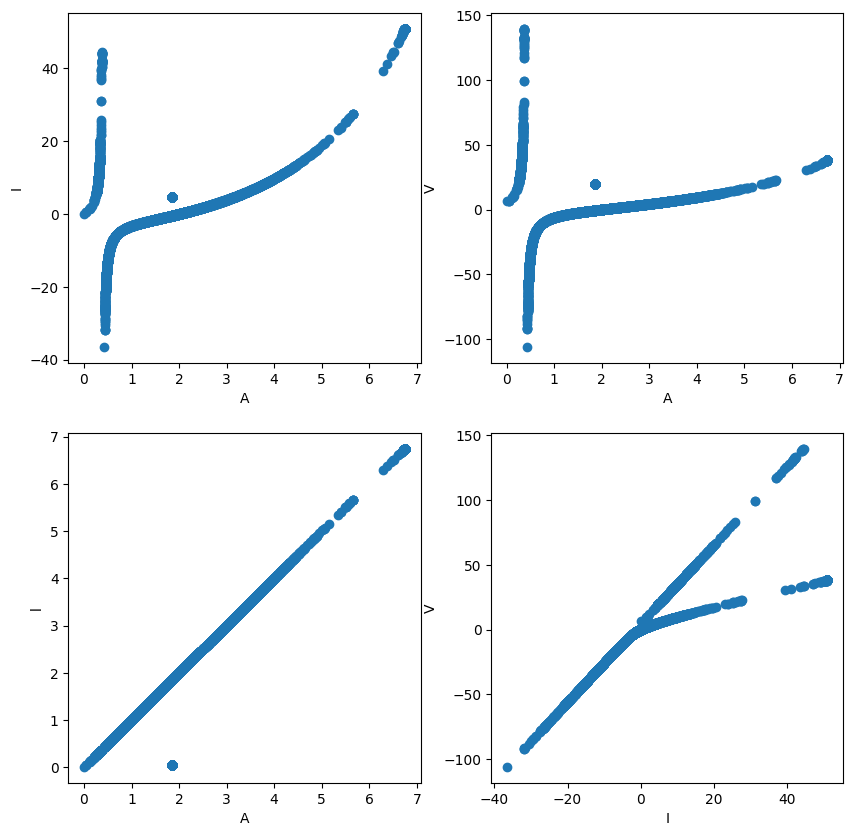

In [8]:
# set a range of initial values
A_range = np.linspace(0, 2, 20)
I_range = np.linspace(4, 10, 20)
V_range = np.linspace(0, 10, 20)
l_range = np.linspace(0, 1, 20)

# Create a boolean mask for the constraint 
# The resulting arrays for A_range, I_range, V_range, and L_range 
# will only contain values that satisfy the constraint.
mask = I_range > (A_range - l_range) * np.sqrt(1 + A_range**2)

# Apply the mask to all arrays
A_range = A_range[mask]
I_range = I_range[mask]
V_range = V_range[mask]
l_range = l_range[mask]

# initialize arrays to store solutions
A_sol = []
I_sol = []
V_sol = []
l_sol = []

# loop through all combinations of initial values
for a in A_range:
    for i in I_range:
        for v in V_range:
            for ll in l_range:
                x0 = [a, i, v, ll]
                sol = root(equations, x0, method='hybr')
                if sol.success: # check if solution was found
                    A_sol.append(sol.x[0])
                    I_sol.append(sol.x[1])
                    V_sol.append(sol.x[2])
                    l_sol.append(sol.x[3])

# plot the solutions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(A_sol, I_sol)
axs[0, 0].set_xlabel('A')
axs[0, 0].set_ylabel('I')
axs[0, 1].scatter(A_sol, V_sol)
axs[0, 1].set_xlabel('A')
axs[0, 1].set_ylabel('V')
axs[1, 0].scatter(A_sol, l_sol)
axs[1, 0].set_xlabel('A')
axs[1, 0].set_ylabel('l')
axs[1, 1].scatter(I_sol, V_sol)
axs[1, 1].set_xlabel('I')
axs[1, 1].set_ylabel('V')
plt.show()

# x0 = [0.5, 0.5, 5, 5]
# sol = root(equations, x0, method='hybr')
# sol = root(equations, x0, method='broyden1')
# sol = root(equations, x0, method='anderson')

# print(sol.x)

In [17]:
print(I_sol)
np.shape(I_sol)

[8.622449361755177, 9.571037983180915, 9.37432706483845, 9.037299252095073, 9.334587475647906, 9.25677610716218, 9.374655026684087, 9.042289866489451, 9.349379421938565, 9.331570052467836, 9.37511612148413, 9.047319808936024, 9.366235626761817, 9.818817725598272, 9.375714747924569, 9.052388411268542, 9.386054561466974, 11.226531791009796, 9.376451013533385, 9.057493164762743, 9.409720137382493, 8.102373916277783, 9.37733298554923, 9.062633142183618, 9.437973802627138, 9.374685988165643, 9.067806682329051, 7.29127291839089, 9.37590599812501, 9.073012394322605, 9.509784156008282, 9.37729566665383, 9.078248232431877, 9.51024555971388, 10.884259083094177, 9.378841206375798, 9.08351299686076, 9.495553976179206, 9.380556524468052, 9.088805184361924, 9.502288371536258, 9.38244775814097, 9.094122878143912, 9.526654263678784, 9.38452162658875, 9.099464711051013, 9.563822237453204, 9.38678375725887, 9.104828074519931, 9.617396962052993, 9.389239483265236, 9.110215320579519, 9.682261895461828, 9.

(60536,)